<a href="https://colab.research.google.com/github/drskprabhakar/AI-ML-DL-colab-notebooks-coding-models/blob/main/Multiclass_DR_cnn_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import os
os.listdir('/content/drive/MyDrive/DR images large data/split/train')

['Proliferate_DR', 'Moderate', 'Mild', 'No_DR', 'Severe']

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(rescale=1/255)

trainimages = datagen.flow_from_directory('/content/drive/MyDrive/DR images large data/split/train',
                                          target_size=(64,64))

valimages = datagen.flow_from_directory('/content/drive/MyDrive/DR images large data/split/val',
                                          target_size=(64,64))

testimages = datagen.flow_from_directory('/content/drive/MyDrive/DR images large data/split/test',
                                            target_size=(64,64))

Found 2929 images belonging to 5 classes.
Found 474 images belonging to 5 classes.
Found 259 images belonging to 5 classes.


In [70]:
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model = Sequential([Conv2D(32,(3,3), activation='relu', input_shape=(64, 64, 3)),
                    MaxPooling2D(2,2),

                    Conv2D(64,(3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.3),

                    Conv2D(96,(3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.3),

                    Conv2D(96,(3,3), activation='relu'),
                    MaxPooling2D(2,2),
                    Dropout(0.3),

                    Flatten(),
                    Dense(512, activation='relu'),
                    Dense(5, activation='softmax')])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 31, 31, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 14, 14, 64)        0         
 g2D)                                                            
                                                                 
 dropout (Dropout)           (None, 14, 14, 64)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 12, 12, 96)       

In [71]:
history = model.fit(trainimages,
          batch_size=32,
          epochs=5,
          validation_data=valimages)
model.save('multiclassDR_model.keras')

Epoch 1/5
92/92 [==============================] - 39s 407ms/step - loss: 1.1193 - accuracy: 0.5599 - val_loss: 0.8915 - val_accuracy: 0.6730
Epoch 2/5
92/92 [==============================] - 38s 409ms/step - loss: 0.8487 - accuracy: 0.7023 - val_loss: 0.8645 - val_accuracy: 0.6983
Epoch 3/5
92/92 [==============================] - 38s 414ms/step - loss: 0.8123 - accuracy: 0.7112 - val_loss: 0.7863 - val_accuracy: 0.7152
Epoch 4/5
92/92 [==============================] - 38s 408ms/step - loss: 0.7838 - accuracy: 0.7156 - val_loss: 0.8145 - val_accuracy: 0.7025
Epoch 5/5
92/92 [==============================] - 38s 407ms/step - loss: 0.7835 - accuracy: 0.7211 - val_loss: 0.7826 - val_accuracy: 0.7300


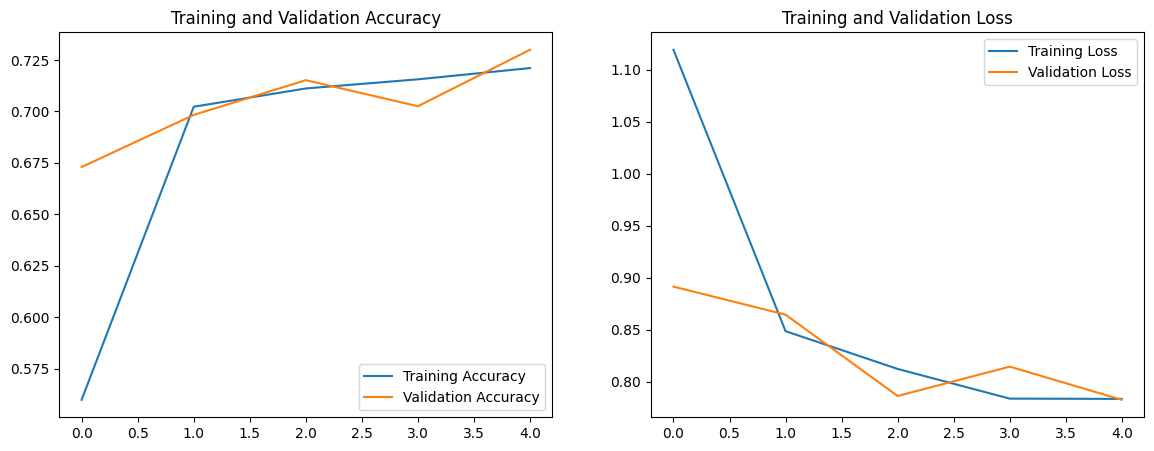

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.show()

In [89]:
predictions = model.predict(testimages)

9/9 [==============================] - 2s 208ms/step


In [90]:
y_pred1 = np.argmax(predictions, axis=1)

In [24]:
y_true = testimages.classes

In [91]:
from sklearn import metrics
metrics.confusion_matrix(y_true, y_pred1)

array([[ 5,  6, 15,  0,  0],
       [13, 28, 29,  0,  1],
       [21, 34, 71,  0,  1],
       [ 2,  8, 11,  0,  0],
       [ 1,  3, 10,  0,  0]])

In [26]:
testimages.class_indices

{'Mild': 0, 'Moderate': 1, 'No_DR': 2, 'Proliferate_DR': 3, 'Severe': 4}

In [92]:
print(metrics.classification_report(y_true, y_pred1,
 target_names= ['mild DR','moderate DR',
'no DR', 'proliferative DR', 'severe DR']))



                  precision    recall  f1-score   support

         mild DR       0.12      0.19      0.15        26
     moderate DR       0.35      0.39      0.37        71
           no DR       0.52      0.56      0.54       127
proliferative DR       0.00      0.00      0.00        21
       severe DR       0.00      0.00      0.00        14

        accuracy                           0.40       259
       macro avg       0.20      0.23      0.21       259
    weighted avg       0.37      0.40      0.38       259



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


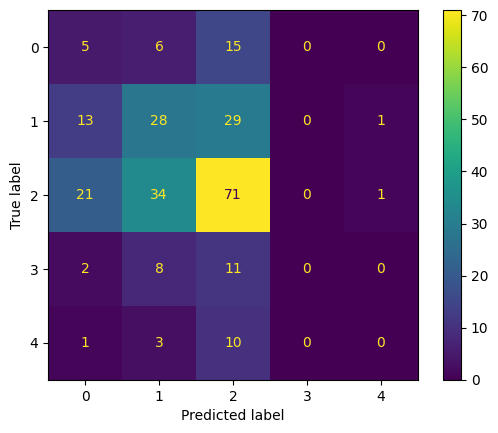

In [93]:
metrics.ConfusionMatrixDisplay.from_predictions(y_true, y_pred1)

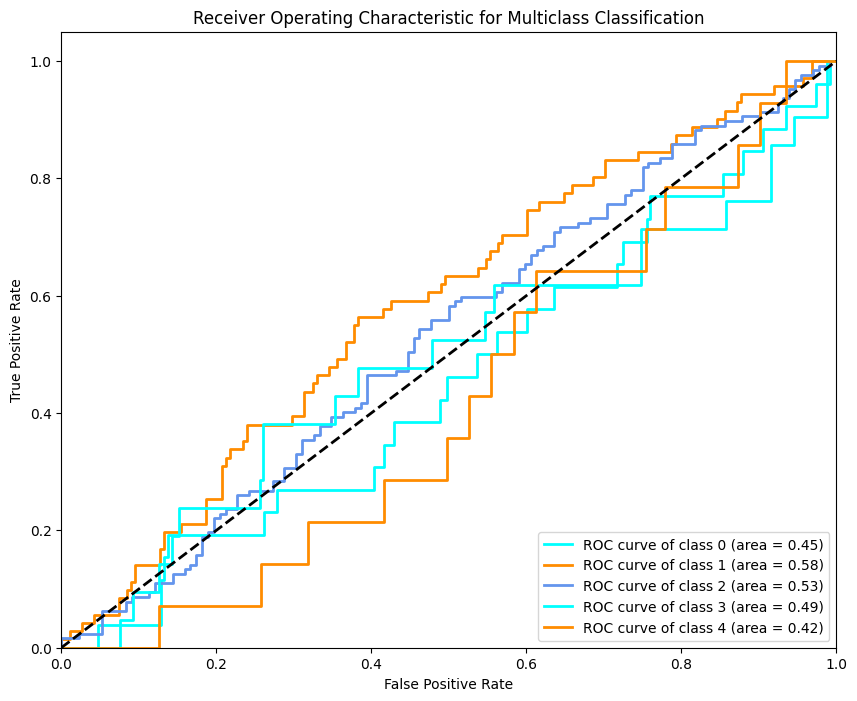

In [94]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import LabelBinarizer
from itertools import cycle

# Assuming you have your model predictions and ground truth labels
# model_predictions = Your model's predicted probabilities for each class
# ground_truth_labels = Ground truth labels for each sample

# Convert labels to one-hot encoding
label_binarizer = LabelBinarizer()
ground_truth_labels_binary = label_binarizer.fit_transform(y_true)

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = len(label_binarizer.classes_)

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(ground_truth_labels_binary[:, i], predictions[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(10, 8))
colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(label_binarizer.classes_[i], roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Multiclass Classification')
plt.legend(loc="lower right")
plt.show()

1/1 [==============================] - 0s 190ms/step
Prediction: mild DR


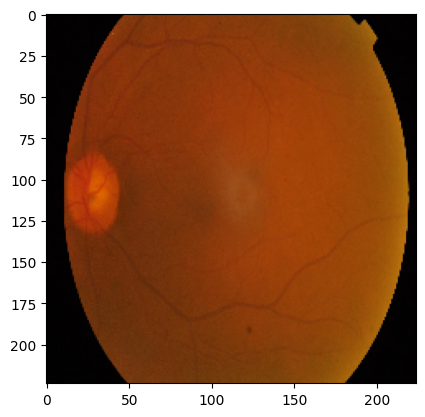

In [64]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model

# Load the trained CNN model
model = load_model('/content/multiclassDR_model.keras')  # Provide the path to your trained model file

# Define a function to predict unknown images
def predict_unknown_image(image_path):
    img = image.load_img(image_path, target_size=(64, 64))  # Assuming images are resized to 150x150
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Expand dimensions to match batch size
    img_array /= 255.0  # Normalize pixel values

    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction)  # Get the index of the class with the highest probability
    class_names = ["mild DR", "moderate DR", "No DR", "proliferative DR", "Severe DR"]  # Example class names, modify as per your multiclass classes
    predicted_class_name = class_names[predicted_class_index]

    return predicted_class_name

# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR images large data/Mild/0024cdab0c1e.png" # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage = image.load_img('/content/drive/MyDrive/DR images large data/Mild/0024cdab0c1e.png')
plt.imshow(testimage)

1/1 [==============================] - 0s 25ms/step
Prediction: moderate DR


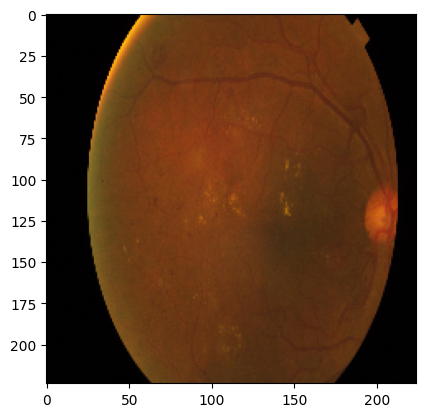

In [65]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR images large data/Moderate/000c1434d8d7.png" # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage = image.load_img('/content/drive/MyDrive/DR images large data/Moderate/000c1434d8d7.png')
plt.imshow(testimage)

1/1 [==============================] - 0s 73ms/step
Prediction: No DR


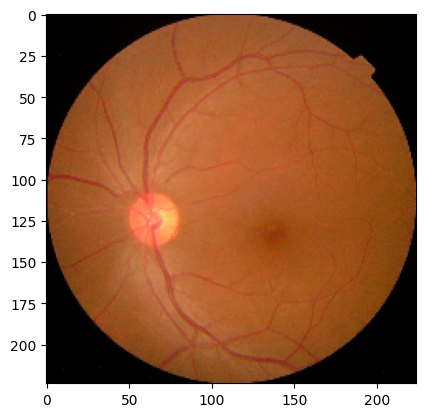

In [66]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR images large data/No_DR/002c21358ce6.png" # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage = image.load_img('/content/drive/MyDrive/DR images large data/No_DR/002c21358ce6.png')
plt.imshow(testimage)

1/1 [==============================] - 0s 42ms/step
Prediction: proliferative DR


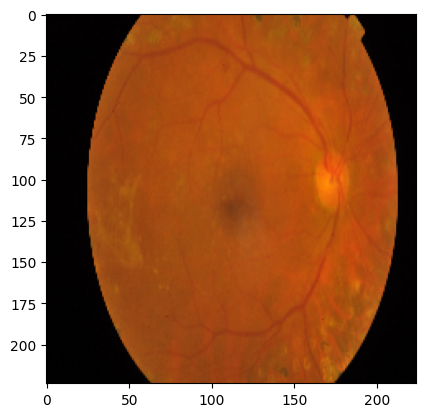

In [67]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR images large data/Proliferate_DR/001639a390f0.png" # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage = image.load_img('/content/drive/MyDrive/DR images large data/Proliferate_DR/001639a390f0.png')
plt.imshow(testimage)

1/1 [==============================] - 0s 102ms/step
Prediction: Severe DR


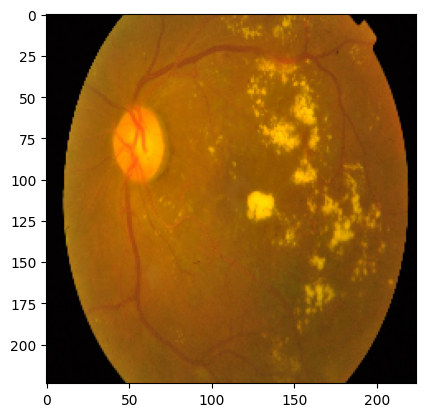

In [69]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/DR images large data/Severe/0104b032c141.png" # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage = image.load_img('/content/drive/MyDrive/DR images large data/Severe/0104b032c141.png')
plt.imshow(testimage)

1/1 [==============================] - 0s 27ms/step
Prediction: proliferative DR


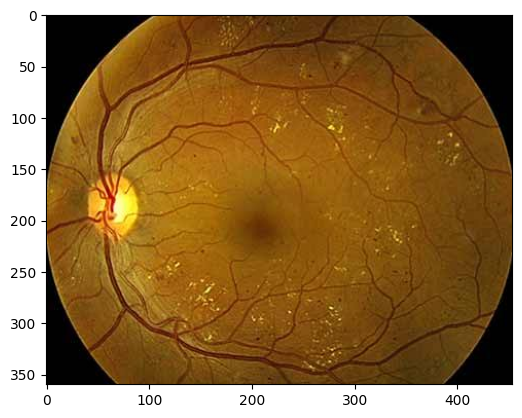

In [68]:
# Example usage:
unknown_image_path = "/content/drive/MyDrive/Severe nPDR"  # Provide the path to the unknown image
prediction = predict_unknown_image(unknown_image_path)
print("Prediction:", prediction)

testimage = image.load_img('/content/drive/MyDrive/Severe nPDR')
plt.imshow(testimage)